In [29]:
%load_ext autoreload
%autoreload 2

from glob import glob
from itertools import combinations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from base_model import *
from utils import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
root = '/Users/aasavarikakne/Desktop/cme291/data/'

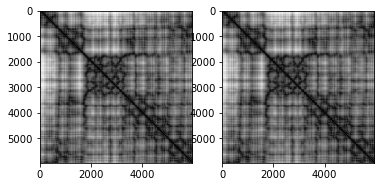

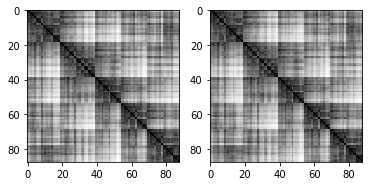

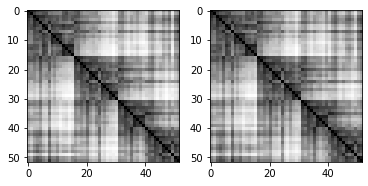

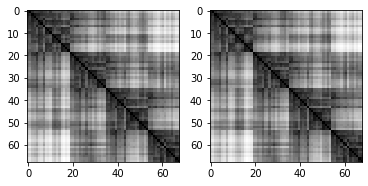

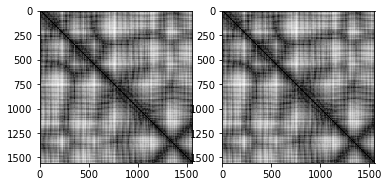

In [36]:
df = pd.DataFrame(columns = ['gene', 'protein1', 'protein2', 'percent_alignment', 'distance'])

for gene_path in glob(root + '*/'):
    for protein1_path, protein2_path in combinations(glob(gene_path + '*/'), 2):
        
        model = Base_model(protein1_path, protein2_path)
        matrices, distance = model.get_distances()      
        # record data in data frame
        data = {
                'gene' : get_dir_name(gene_path),
                'protein1' : get_dir_name(protein1_path),
                'protein2' : get_dir_name(protein2_path),
                'percent_alignment' : model.get_alignment_percentage(),
                'distance' :  distance
        }
        df = df.append(data, ignore_index = True)
        # analyze matrices
    
        for D1, D2 in matrices:
            num_atoms = D1.shape[0]
            if num_atoms >= 50:
                fig = plt.figure()
                ax1 = fig.add_subplot(121)
                ax1.imshow(D1, interpolation='nearest', cmap=cm.Greys_r)
                ax2 = fig.add_subplot(122)
                ax2.imshow(D2, interpolation='nearest', cmap=cm.Greys_r)
                plt.show()